## bioinformatics coursework 2 part 4

In [65]:
# imports
import pandas as pd
pd.set_option('display.max_columns', None)
import pronto
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from prettytable import PrettyTable


In [66]:
# Task 1

# For every pair of diseases in the NSD_GenCC  dataset count the number of genes they
# have in common. Present a table of the top 10 disease pairs and their common gene count with
# the columns Disease Pair , Gene_Count  with the format of the first
# column MONDO:ID1,MONDO:ID2  e.g. MONDO:0100038,MONDO:0000508  (6 marks)
# - (HINT) - use the itertools  function combinations  to create a list of pairs
# - (HINT) - you can use a for  loop to go through the combinations or a string literal  which is
# faster
# - (HINT) - in Python you can use set  comparison set_a & set_b  to find the intersection
# between two sets

gencc_df = pd.read_csv("gencc-submissions.tsv", sep="\t")
mondo=pronto.Ontology("mondo.obo")
NSD_ids = list(map(lambda term: term.id, list(mondo['MONDO:0005071'].subclasses())[1:]))
# think I could also do this easier using the pandas merge function!
# TODO: verify this function does what is intended -> I am suspicious that it is giving wayyy to many results
#       which in gives LOADS of combinations (which take too long to process)
#       I think this is resolved now but still not 100% sure.
NSD_GenCC_df = gencc_df[np.isin(gencc_df['disease_curie'], NSD_ids)]
len(NSD_GenCC_df['disease_curie'].unique())



2225

In [67]:
NSD_GenCC_df

uuid  gene_curie  \
2      GENCC_000101-HGNC_16636-OMIM_118210-HP_0000006...  HGNC:16636   
3      GENCC_000101-HGNC_17939-OMIM_617532-HP_0000007...  HGNC:17939   
4      GENCC_000101-HGNC_11071-OMIM_616291-HP_0000007...  HGNC:11071   
6      GENCC_000101-HGNC_18806-OMIM_614756-HP_0000006...  HGNC:18806   
7      GENCC_000101-HGNC_16369-OMIM_606324-HP_0000007...  HGNC:16369   
...                                                  ...         ...   
18491  GENCC_000105-HGNC_30213-MONDO_0011706-HP_00000...  HGNC:30213   
18492  GENCC_000105-HGNC_1394-OMIM_618087-HP_0000006-...   HGNC:1394   
18496  GENCC_000105-HGNC_2911-MONDO_0010717-HP_000000...   HGNC:2911   
18497  GENCC_000105-HGNC_3363-OMIM_615683-HP_0000007-...   HGNC:3363   
18503  GENCC_000105-HGNC_20778-MONDO_0100154-HP_00000...  HGNC:20778   

      gene_symbol  disease_curie  \
2           KIF1B  MONDO:0007308   
3         SLC45A1  MONDO:0044322   
4          SLC9A1  MONDO:0014572   
6          CAMTA1  MONDO:0013886   
7           PARK7  MONDO:0011658   
...           ...            ...   
18491     ATP13A2  MONDO:0011706   
18492     CACNA1G  MONDO:0060758   
18496        DLST  MONDO:0010717   
18497      ENTPD1  MONDO:0014303   
18503        TUBB  MONDO:0100154   

                                           disease_title  \
2                   Charcot-Marie-Tooth disease type 2A1   
3      intellectual developmental disorder with neuro...   
4                            Lichtenstein-Knorr syndrome   
6      cerebellar dysfunction with variable cognitive...   
7      autosomal recessive early-onset Parkinson dise...   
...                                                  ...   
18491                               Kufor-Rakeb syndrome   
18492  spinocerebellar ataxia 42, early-onset, severe...   
18496         pyruvate dehydrogenase E1-alpha deficiency   
18497                   hereditary spastic paraplegia 64   
18503                        TUBB3-related tubulinopathy   

      disease_original_curie  \
2                OMIM:118210   
3                OMIM:617532   
4                OMIM:616291   
6                OMIM:614756   
7                OMIM:606324   
...                      ...   
18491          MONDO:0011706   
18492            OMIM:618087   
18496          MONDO:0010717   
18497            OMIM:615683   
18503          MONDO:0100154   

                                  disease_original_title classification_curie  \
2                  Charcot-Marie-Tooth disease, type 2A1         GENCC:100004   
3      Intellectual developmental disorder with neuro...         GENCC:100004   
4                            Lichtenstein-Knorr syndrome         GENCC:100004   
6      Cerebellar dysfunction with variable cognitive...         GENCC:100001   
7      Parkinson disease 7, autosomal recessive early...         GENCC:100003   
...                                                  ...                  ...   
18491                               Kufor-Rakeb syndrome         GENCC:100001   
18492  Spinocerebellar ataxia 42, early-onset, severe...         GENCC:100001   
18496         pyruvate dehydrogenase E1-alpha deficiency         GENCC:100008   
18497         Spastic paraplegia 64, autosomal recessive         GENCC:100004   
18503                        TUBB3-related tubulinopathy         GENCC:100001   

                classification_title   moi_curie            moi_title  \
2                            Limited  HP:0000006   Autosomal dominant   
3                            Limited  HP:0000007  Autosomal recessive   
4                            Limited  HP:0000007  Autosomal recessive   
6                         Definitive  HP:0000006   Autosomal dominant   
7                           Moderate  HP:0000007  Autosomal recessive   
...                              ...         ...                  ...   
18491                     Definitive  HP:0000007  Autosomal recessive   
18492                     Definitive  HP:0000006   Autosomal dominant   
18496  No Known Di

In [68]:
# CODE IS LEGIT UNRUNNABLE LOL

# intersection_sizes = {disease_pair : gene_intersection}
# for each disease
#   genes = set(disease.genes)
#   for each other_disease in df
#       other_genes = set(other_disease.genes)
#       gene_intersection = intersection(genes, other_genes)
#       len_of_gene_intersection = len(gene_intersection)
#       intersection_sizes[disease|other_disease] = len_of_gene_intersection


# disease_sets = {}
# for i in NSD_GenCC_df.index:
#     disease_id = NSD_GenCC_df['disease_curie'][i]
#     if disease_id not in disease_sets:
#         # query for all genes related to this disease
#         genes = NSD_GenCC_df[NSD_GenCC_df['disease_curie'] == disease_id].gene_curie
#         genes_set = set(genes)
#         disease_sets[disease_id] = genes_set

# print(disease_sets)

# THIS IS WHAT IS EXPLODING MY LAPTOP - 0(N^2) SPACE ITS WAY TOO BIG NEED TO VERIFY I AM DOING THE CORRECT THING
# Ian recommends using combinations func from itertools, I will try this now...
# disease_pair_gene_intersection = {}
# for d in disease_sets:
#     for paired_d in disease_sets:
#         if paired_d != d:
#             d_set = disease_sets[d]
#             pd_set = disease_sets[paired_d]
#             g_intersection = d_set.intersection(pd_set)
#             disease_pair_gene_intersection[d + '>>' + paired_d] = len(g_intersection)
# print(disease_pair_gene_intersection)
            



In [69]:
# the unique() call is important here as without it there are way too many combinations that code is not longer exectutable in reasonable time.
#disease_pairs = list(combinations(list(NSD_GenCC_df['disease_curie'].unique()), 2))
disease_pairs = list(combinations(list(NSD_GenCC_df['disease_title'].unique()), 2))

# TODO: consider using a array here rather than a dictionary
disease_pairs_gene_intersection_lengths = {}
print(f"There are {len(disease_pairs)} disease pairs to iterate through!!! (this is gonna take some time)")

# can make this more efficient, by not recalulcating sets, but storing their values and retrieving them
#gene_sets = {d: set(NSD_GenCC_df[NSD_GenCC_df['disease_curie'] == d].gene_curie) for d in list(NSD_GenCC_df['disease_curie'].unique())}
gene_sets = {d: set(NSD_GenCC_df[NSD_GenCC_df['disease_title'] == d].gene_curie) for d in list(NSD_GenCC_df['disease_title'].unique())}
print("gene intersections calculated")
for d1, d2 in disease_pairs:
    g1_set = gene_sets[d1]
    g2_set = gene_sets[d2]
    g_inter = g1_set.intersection(g2_set)
    # assumption: any intersection with length=0 wont make it into the top 10, so we don't append in order to make the sort slightly faster
    if len(g_inter) > 0:
        disease_pairs_gene_intersection_lengths[(d1, d2)] = len(g_inter)
    
print("intersection lengths calculated, now sorting...") 
sorted_d = dict({k: v for k, v in sorted(disease_pairs_gene_intersection_lengths.items(), key=lambda item: -item[1])})
print(sorted_d, '\n')
    
for i in range(10):
    print(list(sorted_d.items())[i])


There are 2474200 disease pairs to iterate through!!! (this is gonna take some time)
gene intersections calculated
intersection lengths calculated, now sorting...
{('hearing loss, autosomal recessive', 'nonsyndromic genetic hearing loss'): 54, ('autosomal dominant nonsyndromic hearing loss', 'nonsyndromic genetic hearing loss'): 29, ('Leigh syndrome', 'Leigh syndrome with leukodystrophy'): 28, ('Zellweger spectrum disorders', 'peroxisome biogenesis disorder'): 13, ('complex neurodevelopmental disorder', 'autosomal dominant non-syndromic intellectual disability'): 11, ('autosomal dominant nonsyndromic hearing loss', 'hearing loss, autosomal recessive'): 11, ('syndromic intellectual disability', 'intellectual disability, autosomal dominant 40'): 10, ('syndromic intellectual disability', 'complex neurodevelopmental disorder'): 10, ('retinitis pigmentosa', 'Leber congenital amaurosis'): 9, ('non-syndromic X-linked intellectual disability', 'X-linked complex neurodevelopmental disorder'): 8

2225
There are 93 edges in the graph


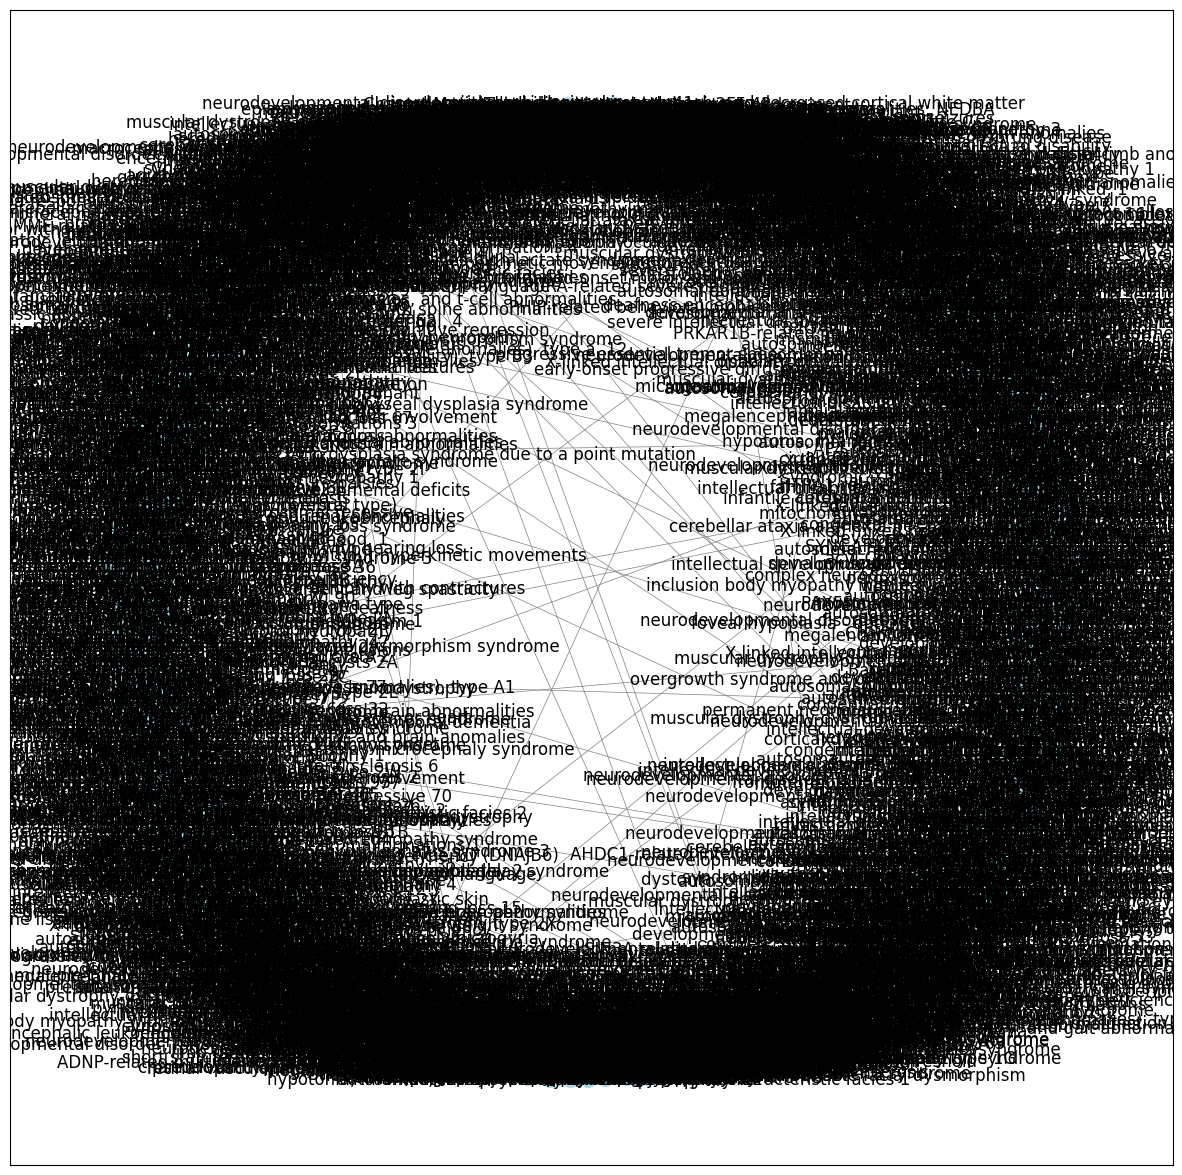

In [70]:
# Task 2
# Network time!

# Create an empty graph
G = nx.Graph()

# add all nodes
# could change disease curie to disease name?
#G.add_nodes_from(set(NSD_GenCC_df['disease_curie']))
G.add_nodes_from(set(NSD_GenCC_df['disease_title']))
print(len(G.nodes))

# add the edges (connections) to the network
# NEED TO CHECK THIS WORKS! specifically that the output of this filter is usable by the networkx graph functions
edges = list(filter(lambda x: sorted_d[x] >= 3, sorted_d))

print(f"There are {len(edges)} edges in the graph")
G.add_edges_from(edges)

# draw the network with a force directed layout specify plot size and node size and thin light gray edges
plt.figure(figsize=(15,15))
nx.draw_networkx(G, pos=nx.spring_layout(G,k=2), with_labels=True,node_size=100,edge_color='gray',node_color='lightblue',width=0.5)


There are 93 edges in the graph


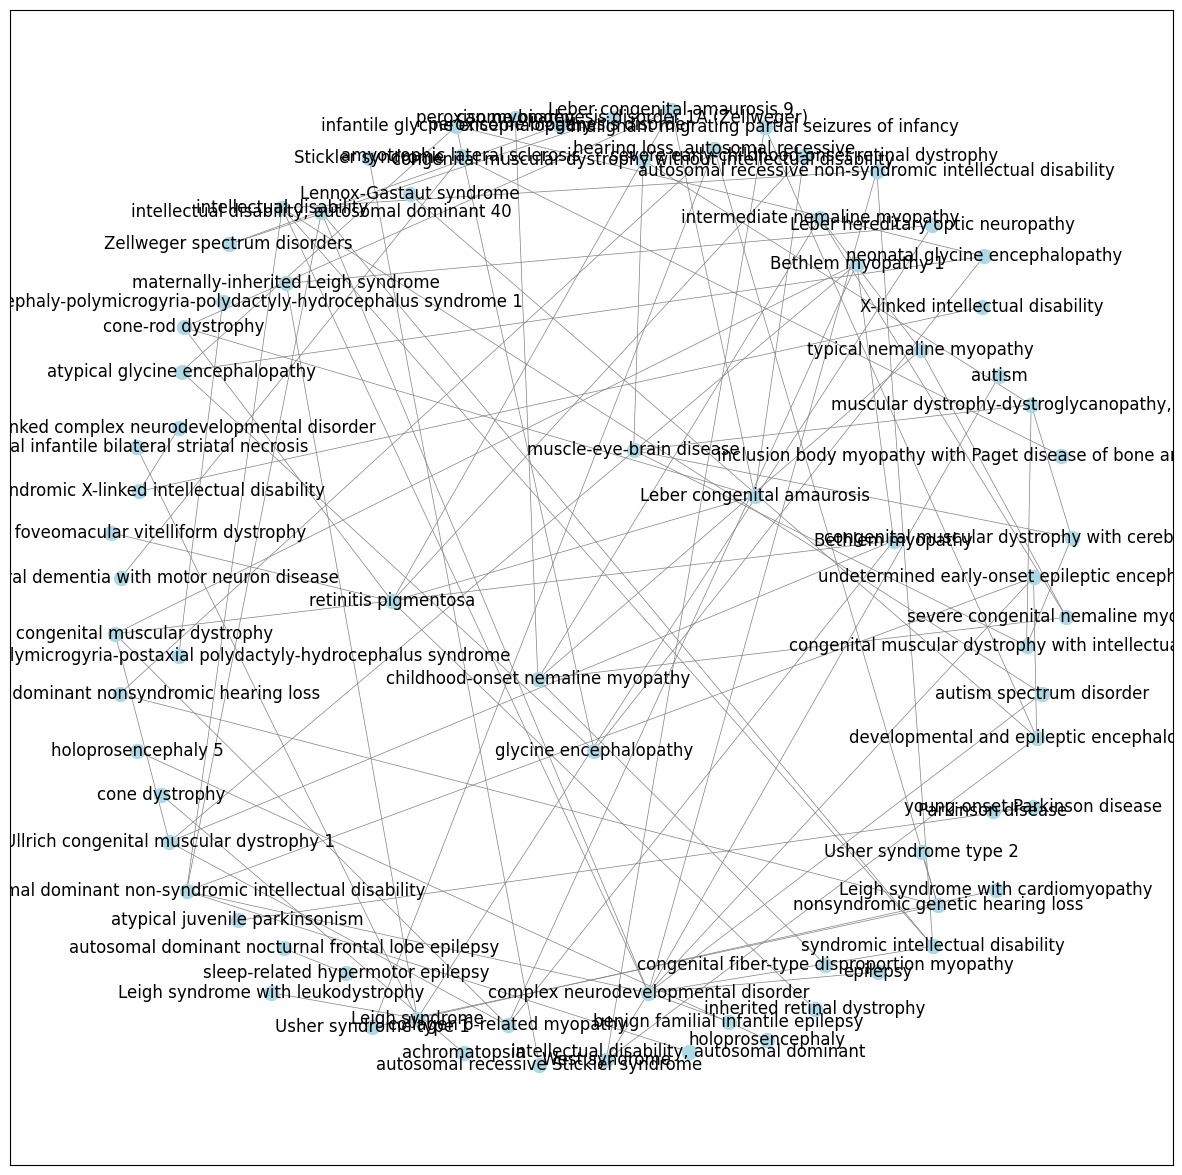

In [71]:
# PLOTTING ONLY NODES WITH DEGREE GREATER THAN 0

# add all nodes
# could change disease curie to disease name?
nodes = list(map(lambda y: y[0], filter(lambda x: x[1] > 0, G.degree())))
G = nx.Graph()
G.add_nodes_from(nodes) 

# add the edges (connections) to the network
edges = list(filter(lambda x: sorted_d[x] >= 3, sorted_d))

print(f"There are {len(edges)} edges in the graph")
G.add_edges_from(edges)

# draw the network with a force directed layout specify plot size and node size and thin light gray edges
plt.figure(figsize=(15,15))
nx.draw_networkx(G, pos=nx.spring_layout(G,k=2), with_labels=True,node_size=100,edge_color='gray',node_color='lightblue',width=0.5)

In [72]:
# Task 3
# Clustering time!

# code ripped from tutorial wk8 :)

# we're going to cluster the networkx modularity clustering algorithm
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
# This produces many communites -> is a bit nasty...

# print the number of communities
print('The network has '+str(len(communities))+' communities.\n')

# create sub-grpahs for each community
subgraphs = []
for community in communities:
    subgraphs.append(G.subgraph(community))

# print the number of nodes in each community
#community_sizes = {}
for i, subgraph in enumerate(subgraphs):
    print('Community '+str(i+1)+' has '+str(subgraph.number_of_nodes())+' nodes.')
    #community_sizes['community_'+str(i)] = subgraph.number_of_nodes()
    
print('\n\n')

table = PrettyTable()
table.add_column("Community Number", [1,2,3,4,5,6,7,8,9,10])
table.add_column("Number of Diseases", [12,7,6,6,5,5,5,4,4,3])
print(table)




The network has 18 communities.

Community 1 has 12 nodes.
Community 2 has 7 nodes.
Community 3 has 6 nodes.
Community 4 has 6 nodes.
Community 5 has 5 nodes.
Community 6 has 5 nodes.
Community 7 has 5 nodes.
Community 8 has 4 nodes.
Community 9 has 4 nodes.
Community 10 has 3 nodes.
Community 11 has 3 nodes.
Community 12 has 3 nodes.
Community 13 has 3 nodes.
Community 14 has 2 nodes.
Community 15 has 2 nodes.
Community 16 has 2 nodes.
Community 17 has 2 nodes.
Community 18 has 2 nodes.



+------------------+--------------------+
| Community Number | Number of Diseases |
+------------------+--------------------+
|        1         |         12         |
|        2         |         7          |
|        3         |         6          |
|        4         |         6          |
|        5         |         5          |
|        6         |         5          |
|        7         |         5          |
|        8         |         4          |
|        9         |         4          |


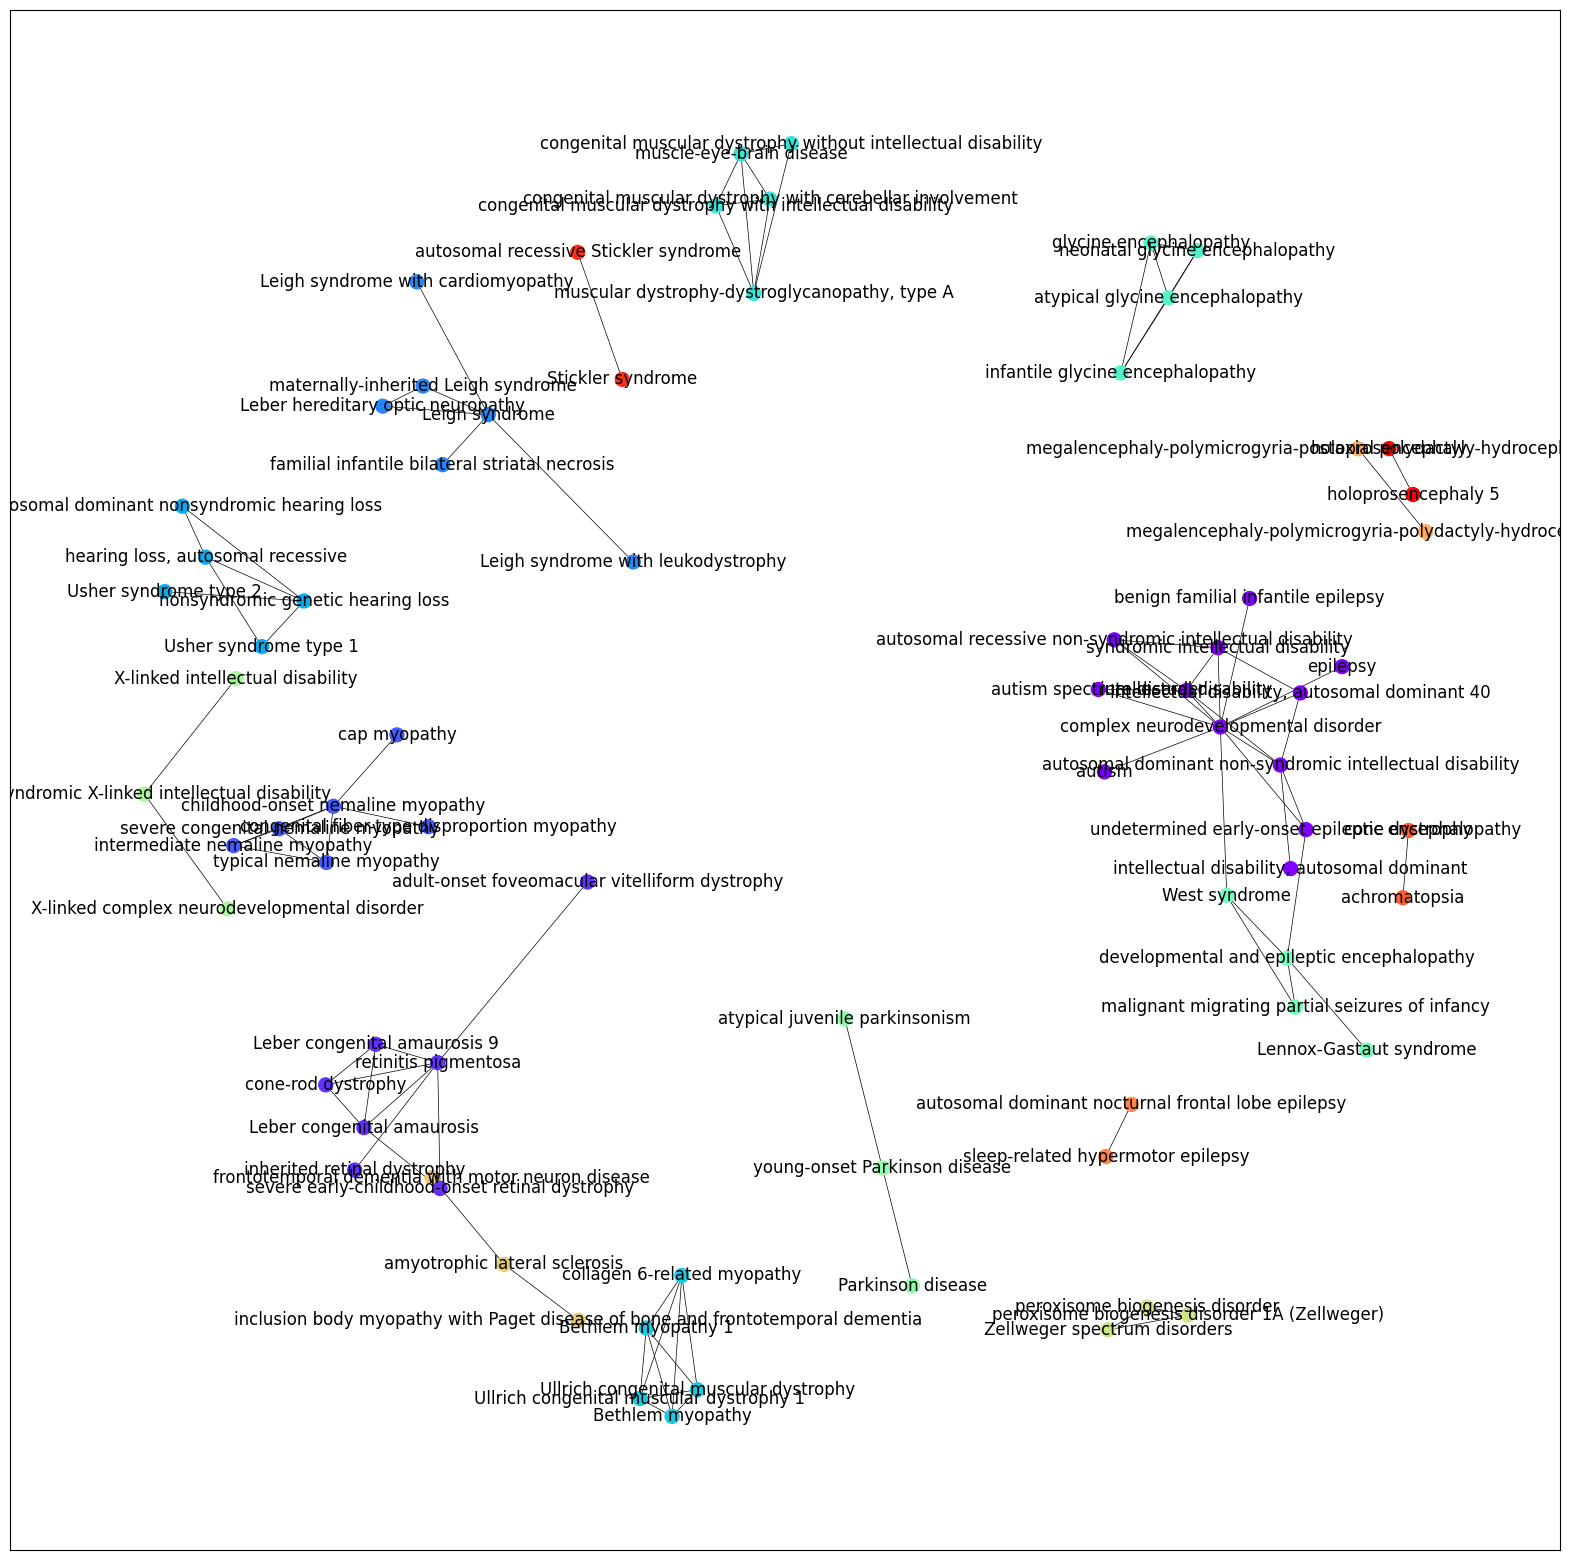

In [216]:
# Task 4
# Plot the network with nodes labelled with the disease name and coloured by the cluster
# they belong to, layout the graph so that clusters are reasonably well separated (5 marks)
# - *(HINT) - look at the course notebook for networks where we plot clusters in this way for a
# different example

# again code is ripped straight out the tutorial wk8 :(
# TODO: fiddle with the graph so layout is reasonably good/clear



# cleaning all communities with only 1 node as they are cringe.
not_lonely_communities = list(filter(lambda sg: len(sg) > 1, communities))

communityDict = dict()

# loop through the communities
for i, community in enumerate(not_lonely_communities):
    # loop through the diseases in the community
    for gene_id in community:
        # add the disease and community to the dictionary
        communityDict[gene_id] = i
        

# plot the graph with the communities coloured
# create a list of 2167 colours as we have loads of communities
communityColours = cm.rainbow(np.linspace(0, 1, len(not_lonely_communities)))



new_nodes = np.unique(np.array([sc for c in not_lonely_communities for sc in list(c)]))

# TODO: Label nodes with disease name rather than disease ID
# DONE but a bit ugly??

# CREATING A NEW GRAPH THAT WILL HAVE LESS NODES CLUTTERING SCREEN
G = nx.Graph()

# add all nodes
# could change disease curie to disease name?
G.add_nodes_from(new_nodes) 

# add the edges (connections) to the network
edges = list(filter(lambda x: sorted_d[x] >= 3, sorted_d))
G.add_edges_from(edges)


# create a list of the node colours
nodeColours = [communityColours[communityDict[node]] for node in G.nodes()]

# create a list of the node labels
nodeLabels = {node:node for node in G.nodes()}
#print(nodeLabels)

# plot the graph
import matplotlib.pyplot as plt

# set the figure size
plt.figure(figsize=(20,20))

# draw the graph separating nodes by their community
# for more seperation edit the spring_layout params
pos = nx.spring_layout(G, k=0.7, iterations=150, scale=10)
nx.draw_networkx(G, pos, node_color=nodeColours, with_labels=True, node_size=100, font_size=12, width=0.5)

There are 93 edges in the graph
The network has 2167 communities.

Community 1 has 12 nodes.
Community 2 has 7 nodes.
Community 3 has 6 nodes.
Community 4 has 6 nodes.
Community 5 has 5 nodes.
Community 6 has 5 nodes.
Community 7 has 5 nodes.
Community 8 has 4 nodes.
Community 9 has 4 nodes.
Community 10 has 3 nodes.
Community 11 has 3 nodes.
Community 12 has 3 nodes.
Community 13 has 3 nodes.
Community 14 has 2 nodes.
Community 15 has 2 nodes.
Community 16 has 2 nodes.
Community 17 has 2 nodes.
Community 18 has 2 nodes.
Community 19 has 1 nodes.
Community 20 has 1 nodes.
Community 21 has 1 nodes.
Community 22 has 1 nodes.
Community 23 has 1 nodes.
Community 24 has 1 nodes.
Community 25 has 1 nodes.
Community 26 has 1 nodes.
Community 27 has 1 nodes.
Community 28 has 1 nodes.
Community 29 has 1 nodes.
Community 30 has 1 nodes.
Community 31 has 1 nodes.
Community 32 has 1 nodes.
Community 33 has 1 nodes.
Community 34 has 1 nodes.
Community 35 has 1 nodes.
Community 36 has 1 nodes.
Commu

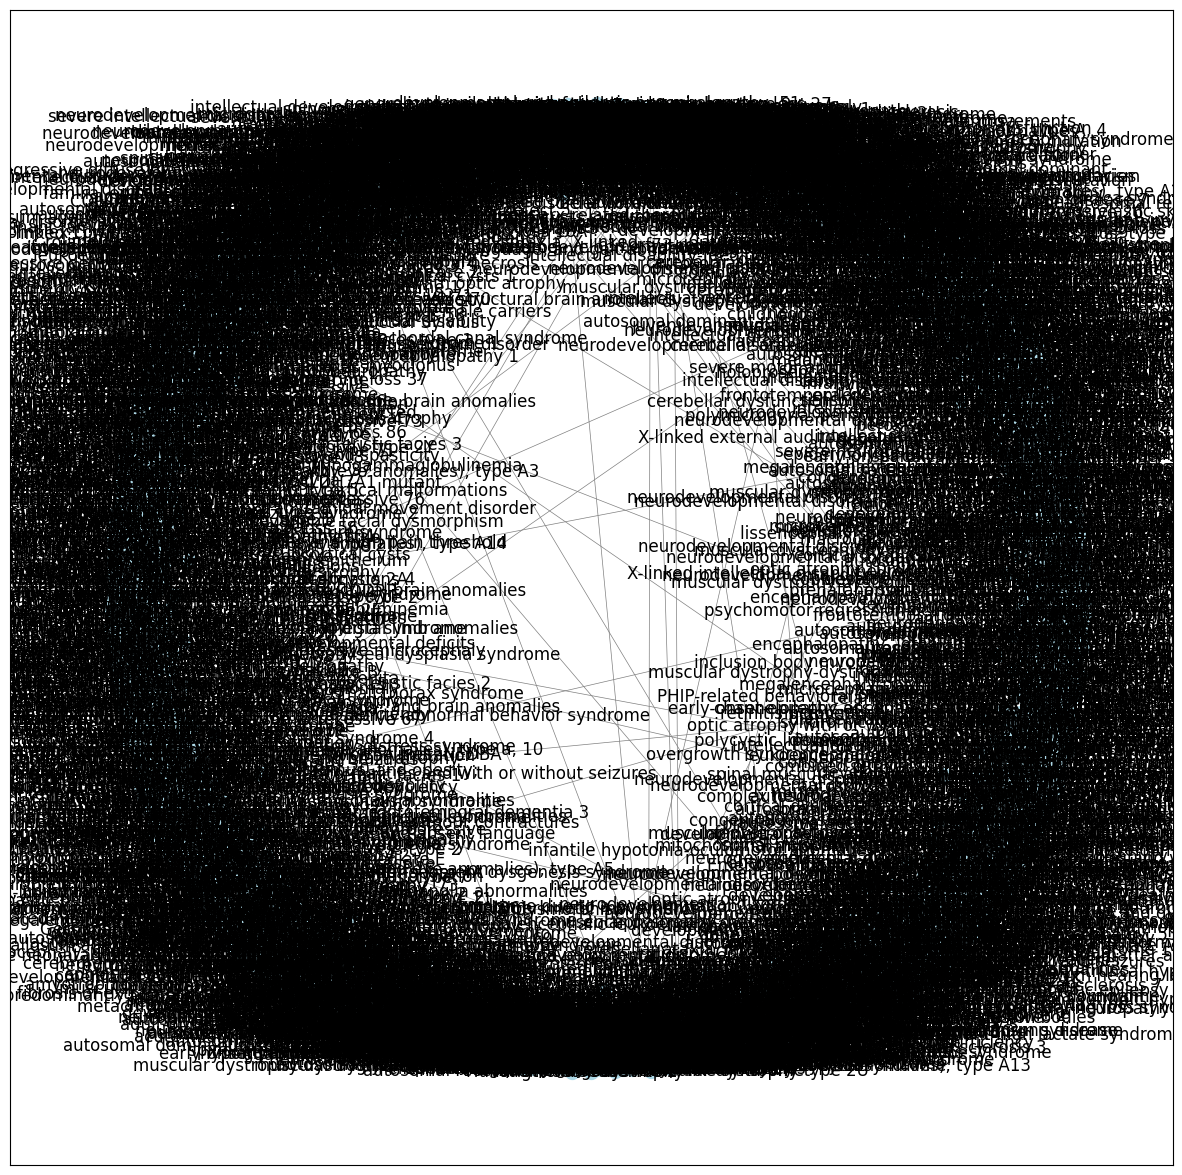

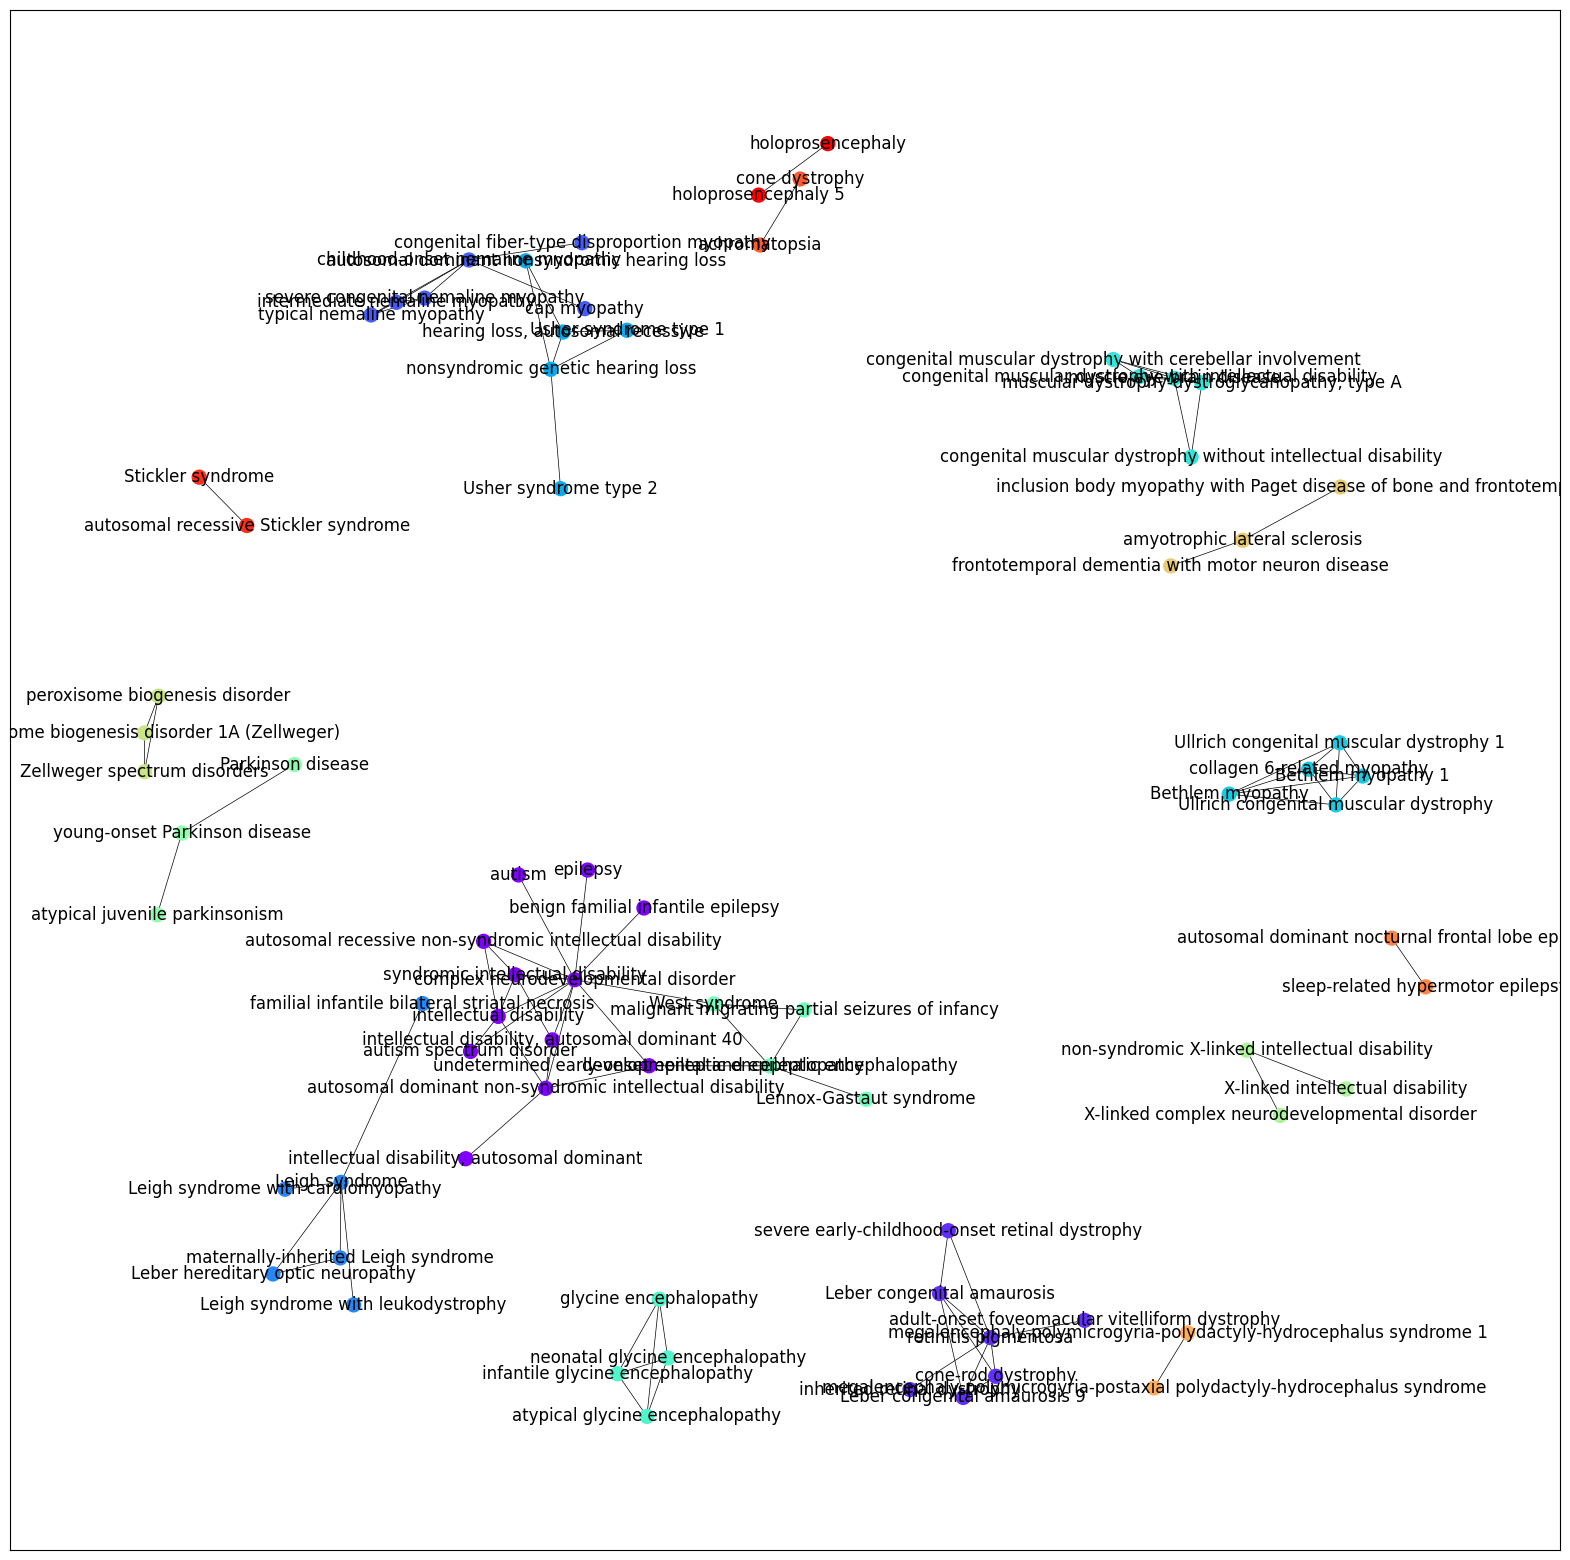

In [74]:
# FOR APPENDIX
# PLOTTING A NETWORK WITH ALL NODES, NO MATTER THEIR DEGREE

G = nx.Graph()

# add all nodes
# could change disease curie to disease name?
#G.add_nodes_from(set(NSD_GenCC_df['disease_curie']))
G.add_nodes_from(set(NSD_GenCC_df['disease_title']))

# add the edges (connections) to the network
# NEED TO CHECK THIS WORKS! specifically that the output of this filter is usable by the networkx graph functions
edges = list(filter(lambda x: sorted_d[x] >= 3, sorted_d))

print(f"There are {len(edges)} edges in the graph")
G.add_edges_from(edges)

# draw the network with a force directed layout specify plot size and node size and thin light gray edges
plt.figure(figsize=(15,15))
nx.draw_networkx(G, pos=nx.spring_layout(G,k=2), with_labels=True,node_size=100,edge_color='gray',node_color='lightblue',width=0.5)

# we're going to cluster the networkx modularity clustering algorithm
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
# This produces many communites -> is a bit nasty...

# print the number of communities
print('The network has '+str(len(communities))+' communities.\n')

# create sub-grpahs for each community
subgraphs = []
for community in communities:
    subgraphs.append(G.subgraph(community))

# print the number of nodes in each community
#community_sizes = {}
for i, subgraph in enumerate(subgraphs):
    print('Community '+str(i+1)+' has '+str(subgraph.number_of_nodes())+' nodes.')
    #community_sizes['community_'+str(i)] = subgraph.number_of_nodes()
    
print('\n\n')

table = PrettyTable()
table.add_column("Community Number", [1,2,3,4,5,6,7,8,9,10])
table.add_column("Number of Diseases", [12,7,6,6,5,5,5,4,4,3])
print(table)


# cleaning all communities with only 1 node as they are cringe.
not_lonely_communities = list(filter(lambda sg: len(sg) > 1, communities))

communityDict = dict()

# loop through the communities
for i, community in enumerate(not_lonely_communities):
    # loop through the diseases in the community
    for gene_id in community:
        # add the disease and community to the dictionary
        communityDict[gene_id] = i
        

# plot the graph with the communities coloured
# create a list of 2167 colours as we have loads of communities
communityColours = cm.rainbow(np.linspace(0, 1, len(not_lonely_communities)))

new_nodes = np.unique(np.array([sc for c in not_lonely_communities for sc in list(c)]))

# CREATING A NEW GRAPH THAT WILL HAVE LESS NODES CLUTTERING SCREEN
G = nx.Graph()

# add all nodes
# could change disease curie to disease name?
G.add_nodes_from(new_nodes) 

# add the edges (connections) to the network
edges = list(filter(lambda x: sorted_d[x] >= 3, sorted_d))
G.add_edges_from(edges)


# create a list of the node colours
nodeColours = [communityColours[communityDict[node]] for node in G.nodes()]

# create a list of the node labels
nodeLabels = {node:node for node in G.nodes()}
#print(nodeLabels)

# plot the graph
import matplotlib.pyplot as plt

# set the figure size
plt.figure(figsize=(20,20))

# draw the graph separating nodes by their community
# for more seperation edit the spring_layout params
pos = nx.spring_layout(G, k=0.3, iterations=60, scale=2)
nx.draw_networkx(G, pos, node_color=nodeColours, with_labels=True, node_size=100, font_size=12, width=0.5)



